In [37]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [54]:
# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [52]:
def plot_and_render_unireg(feature,response):
    plt.subplot()
    fit = np.polyfit(feature, response, deg=1)
    predicted = fit[0]*feature + fit[1]
    print("R2 ", r2_score(response, predicted))
    plt.plot(feature, predicted ,color='red')
    plt.subplot()
    plt.scatter(feature, response)
    plt.show()

R2  0.486100697873


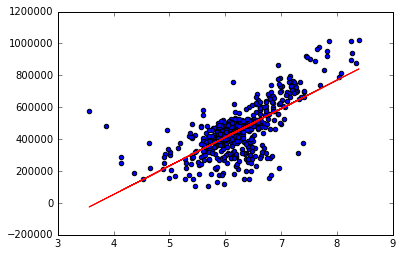

In [48]:
rooms = features['RM']
plot_and_render_unireg(rooms, prices)

R2  0.578618940139


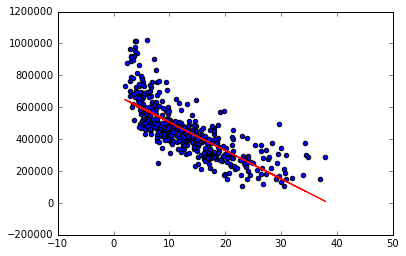

In [49]:
lstat = features['LSTAT']
plot_and_render_unireg(lstat, prices)

R2  0.269395777788


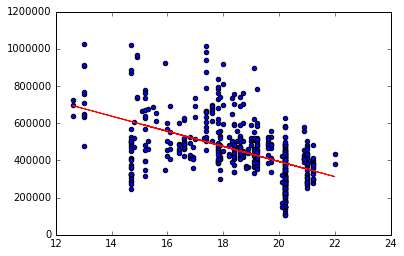

In [53]:
ptratio = features['PTRATIO']
plot_and_render_unireg(ptratio, prices)

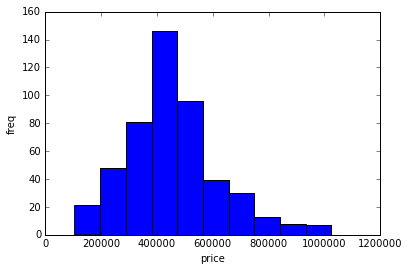

In [59]:
plt.hist(list(prices), bins=10)
plt.xlabel("price")
plt.ylabel("freq")
plt.show()

In [100]:
# try out linear multivariate reg
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from time import time
lin_reg = LinearRegression()
dtree_reg = DecisionTreeRegressor()
pruned_dtree_reg = dtree_reg = DecisionTreeRegressor(max_depth=4)

runs = 1000

# returns mean 2 score, time taken
def exec_reg(runs, reg, features, response):
    mean = 0
    t_start = time()
    for k in range(runs):
        X_train, X_test, y_train, y_test = train_test_split(features, response)
        lin_reg.fit(X_train, y_train)
        predicted = lin_reg.predict(X_test)
        mean += r2_score(y_test, predicted)/runs 
    t_end = time()
    return mean, t_end-t_start

linear_mean_score, linear_duration = exec_reg(runs, lin_reg, features, prices)

decision_tree_mean_score, decision_tree_duration = exec_reg(runs, dtree_reg, features, prices)

pruned_dtree_mean_score, pruned_dtree_duration = exec_reg(runs, pruned_dtree_reg, features, prices)

print("linear regression mean score, R2: {:4f}".format(linear_mean_score) )
print("linear regression took {:4f} sec to run".format(linear_duration) )
print("desc tree regression mean score, R2: {:4f}".format(decision_tree_mean_score) )
print("desc tree regression took {:4f} sec to run".format(decision_tree_duration) )
print("pruned desc tree regression mean score, R2: {:4f}".format(pruned_dtree_mean_score) )
print("pruned desc tree regression took {:4f} sec to run".format(pruned_dtree_duration) )


linear regression mean score, R2: 0.702273
linear regression took 2.086158 sec to run
desc tree regression mean score, R2: 0.703263
desc tree regression took 1.678216 sec to run
pruned desc tree regression mean score, R2: 0.702150
pruned desc tree regression took 1.733051 sec to run
